# Exploring Police Shootings in the United States: A Comprehensive Analysis (2015-Current Day)
- Authors: Mykyta Lepikash, Nick Lo, Brian Chiang

**Table of Contents**
- Summary
- Motivation
- Data Setting
- Method
- Results
- Impact and Limitations
- Challenge Goals
- Plan Evaluation
- Testing
- Collaboration

### Summary
to be written

### Motivation
Police shooting has always been a hot topic especially in the United States of America. These incidents often spark public outcry and debates about law enforcement. While the police has to do their jobs and securing their safety, the suspects also hold their human rights. Therefore, understanding the complex underlying factors behind police shooting is crucial for addressing this issue. 

Our team, consisting of three members, urge to disclose information beneath the surface about police shooting through the police shooting data we found online. By exploring the geographical hotspots, racial disparities, and contextual patterns in police shootings, we aim to contribute valuable insights to the ongoing dialogue on these critical issues. We believe that knowledge gained from this research can play a vital role in advocating for policy changes, raising awareness, and fostering a more equitable and just society. This project aligns with our commitment to using data-driven approaches to address complex societal challenges, and we hope that our findings will contribute to positive changes in policing and community relations.

#### Research Questions
- Where are the geographical hotspots of police shootings in the United States from 2015 to the present day?
- What racial, gender and mental state demographics are disproportionately targeted in police shooting incidents?
- How has the total number of fatal shootings changed since 2015?
- How might data about police shootings disclose problems about social justice?

### Data Setting

[Data Source](https://github.com/washingtonpost/data-police-shootings)

The dataset used for this project is the Fatal Force Database. This database, maintained by The Washington Post, provides detailed information about each police-involved killing in the United States since 2015. The dataset includes demographic information about the deceased, circumstances of the shooting, and details about law enforcement agencies involved. The data is collected through local news report, law enforcement websites, and independent databases since 2015. An advantage of this dataset is that it is up to the current date (v2), which would allow updated information on our analysis.

_There are three ways the context of the dataset might complicate or deepen the analysis:_
1. Data Completeness and Timeliness:
- The dataset is continually updated, posing challenges in ensuring completeness, especially for recent incidents. This constant update introduces the possibility of encountering missing data for the most recent cases.
2. Demographic Representation:
- Certain demographic factors may have variations in reporting accuracy. For example, race and ethnicity data may be subject to different reporting standards, leading to potential complications or misrepresentation of certain groups.
3. Police Accountability Measures:
- The 2022 update standardized and published the names of police agencies involved, influencing the assessment of accountability at the department level. This alteration in data structure may impact the interpretation of trends related to police accountability over time.

### Method
1. Download Data: Use requests to fetch the latest dataset from The Washington Post's GitHub page.
2. Clean Data: Employ pandas to clean and preprocess the dataset, handling missing values and standardizing formats. (dates, categorical data)
3. Prepare Locations: Extract and possibly geocode location data with pandas or geopandas to get coordinates for mapping.
4. Mapping: Create interactive maps using tools like plotly to visualize shooting hotspots, with icons for details.
5. Study Race Data: Analyze racial data distribution with pandas, and visualize disparities using seaborn.
6. Look at Shooting Reasons: Use pandas to categorize shootings by reasons like mental health crises or weapon types and identify trends over time.
7. Bring Findings Together: Synthesize insights across analysis to address research questions, using pandas for data integration.
8. Write a Report: Compile findings and visualizations into a comprehensive report, potentially using Jupyter Notebook for an interactive presentation.
9. Work Together: Collaborate using JupyterHub for shared coding sessions, Zoom for discussions, and git for version control and code sharing.

### Results

In [40]:
# What the data looks like
csv_file_path = "data/fatal-police-shootings-data.csv"
csv_df = pd.read_csv(csv_file_path)
csv_df

PermissionError: [Errno 1] Operation not permitted: 'data/fatal-police-shootings-data.csv'

#### 1. Where are the geographical hotspots of police shootings in the United States from 2015 to the present day?

In [25]:
# Interactive map using plotly express
interactive_map(csv_df)

From the interactive map above, the distribution of police shootings can be clearly seen. It can be indicated that there are more police shooting cases in major cities, such as Los Angeles, New York, Washington D.C., shown by the clustering of pinpoints. On the other hand, rural areas like Nevada, Wyoming have very few police shooting. In addition, there is an apparent difference between the east coast and the west coast, with the east coast having clustered police shooting cases. This might be because of population density, or even race, which we will dig deeper in the following report.

Geographical Hotspots
East Coast:
- New York, Washington D.C, Alabama, Miami, Jacksonville, Orlando, Chicago

Middle:
- Houston, Dallas, Denver

West Coast
- Seattle, Portland, San Francisco, Los Angeles

#### 2. What racial, gender and mental state demographics are disproportionately targeted in police shooting incidents?

##### Racial Demographics:

According to the analysis of police shooting data, it appears that individuals identified as White are disproportionately impacted, followed by Black individuals and then Hispanics. While whites account for the highest number of incidents, it's essential to note that the racial distribution does not necessarily reflect the overall demographic makeup of the population. When considering the proportionality of police shootings in relation to population size, minorities, particularly Black and Hispanic communities, are overrepresented in these incidents.

##### Implications and Consequences:
The disproportionate impact on white individuals may be surprising and warrants further investigation. Possible explanations could include variations in reporting practices, socioeconomic factors, or disparities in policing approaches across different communities. The overrepresentation of black and Hispanic individuals in police shootings emphasizes the need for addressing systemic issues, bias, and reforming law enforcement practices to ensure fair and equitable treatment for all racial groups.

##### Gender Demographics:

Analyzing the gender demographics of police shooting incidents, the data reveals that approximately 96% of the cases involve male individuals. This significant gender imbalance suggests that men are more likely to be involved in police shootings compared to women.

##### Implications and Consequences:
The skewed gender distribution may reflect broader societal patterns, including disparities in criminal behavior, societal expectations, or policing interactions. It underscores the importance of considering both gender and racial factors in discussions about police violence. Policymakers and law enforcement agencies may need to explore targeted strategies for engaging with male individuals in potentially volatile situations, emphasizing de-escalation tactics and alternative approaches to mitigate the risk of fatal outcomes.

##### Mental State Demographics:

Regarding mental state demographics, the bar graph indicates that a substantial number of individuals involved in police shooting incidents are not identified as mentally ill, while a smaller proportion is classified as mentally ill. This highlights that the majority of cases involve individuals without documented mental health issues.

##### Implications and Consequences:
Identifying the specific mental health challenges individuals face can inform policies aimed at crisis intervention and mental health support. The data may reveal patterns in which certain conditions are more likely to result in fatal encounters with law enforcement. This insight could guide the development of specialized training for officers to effectively handle situations involving individuals with mental health issues, emphasizing de-escalation techniques and collaboration with mental health professionals.


In [20]:
plotRace(df)

NameError: name 'unique_years' is not defined

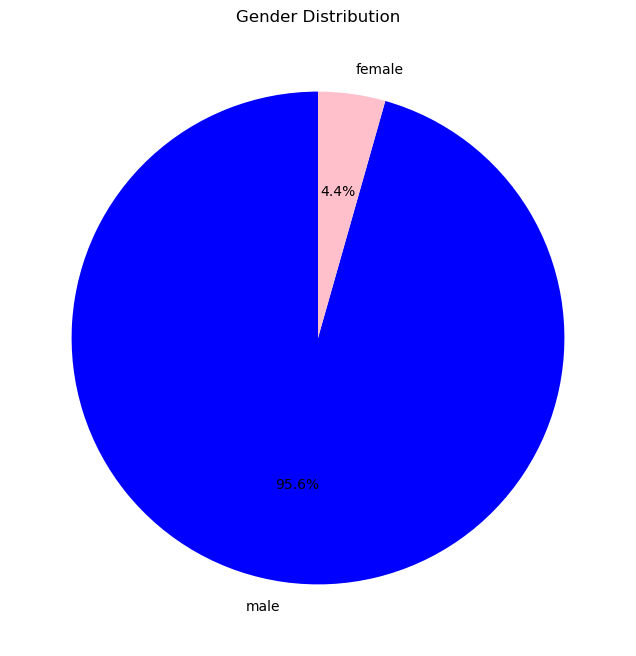

In [14]:
plotGender(df)

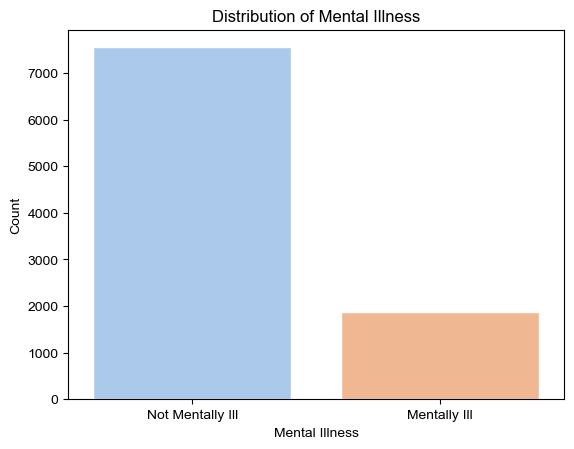

In [15]:
plotMentalState(df)

##### 3. How has the total number of fatal shootings changed since 2015?
The data shows a concerning upward trend in the total number of fatal police shootings over the examined period. The consistent rise in incidents raises questions about the underlying factors contributing to this increase. Possible explanations could include changes in law enforcement tactics, public sentiment, societal unrest, or a combination of these factors.

##### Implications:

This upward trajectory underscores the urgency for comprehensive reforms in law enforcement practices, with a focus on de-escalation training, community policing, and addressing systemic issues that may contribute to the escalation of encounters. Additionally, policymakers should consider implementing measures to enhance transparency and accountability in policing to build trust with the communities they serve.

In [16]:
plotTotalShootings(df)

NameError: name 'unique_years' is not defined

##### 4. How might data about police shootings disclose problems about social justice?



In [41]:
# call function here
plot_threat_type_vs_body_camera(csv_file_path)

shootings_data_path = "data/fatal-police-shootings-data.csv"
unemployment_data_path = "data/Unemployment.csv"
plot_shootings_vs_unemployment(shootings_data_path, unemployment_data_path)

PermissionError: [Errno 1] Operation not permitted: 'data/fatal-police-shootings-data.csv'

### Impact and Limitations

#### Potential Implications of Results:

##### Beneficiaries and Exclusions:

- **Beneficiaries:**
  - Law enforcement agencies, policymakers, community advocates, researchers, and the general public may benefit from a nuanced understanding of police shooting data.
  
- **Exclusions or Harm:**
  - Individuals or groups might be harmed if the data is misinterpreted or selectively used to perpetuate bias, stigmatize communities, or undermine law enforcement without acknowledging the complexities involved.

#### Impact of Data Setting on Results:

##### Data Quality and Geographic Variations:

- **Underreporting or Incomplete Data:**
  - Incomplete or underreported data might skew the analysis, particularly if incidents are not consistently documented or reported across jurisdictions.
  
- **Geographic Variations:**
  - Results may be influenced by geographic variations in law enforcement practices, reporting standards, and community-police relations.

#### Limitations of the Analysis:

1. **Causation vs. Correlation:**
   - The analysis may identify correlations, but establishing causation is challenging. Other factors not considered in the dataset may contribute to observed patterns.

2. **Data Quality:**
   - The accuracy and completeness of the dataset are crucial. Inaccurate or missing data may lead to biased conclusions.

3. **Societal and Cultural Factors:**
   - The analysis might not fully capture the impact of societal and cultural factors on policing dynamics, which can vary widely.

#### Guidelines for Using Conclusions:

- **Contextual Understanding:**
  - Users should approach the conclusions with an understanding of the broader context, acknowledging the limitations of the dataset.

- **Avoiding Generalizations:**
  - Conclusions should not be generalized to all law enforcement agencies or communities, as policing dynamics vary widely.


#### Ethical Considerations:

- **Avoiding Stigmatization:**
  - Care should be taken to present the results ethically, avoiding stigmatization of specific racial, gender, or ethnic groups.

- **Community Involvement:**
  - Involving affected communities in the interpretation of results and policy discussions is essential to ensure diverse perspectives are considered.

In summary, while the analysis provides valuable insights, users should approach the conclusions with caution, considering the limitations and potential ethical implications. The data should be used responsibly to foster positive change, promote transparency, and advance the dialogue around policing practices.

### Challenge Goals
1. New library: Advanced/Interactive Visualizations

- We used plotly.express as a new library to plot our interactive map. Our interactive map shows every point of location of police shooting in the entire US. This enabled us to create visually appealing and insightful representations of the geographical hotspots, demographic disparities, and visual patterns in police shootings. The interactivity empowers users to visualize specific details, giving a more immersive exploration of the dataset.


2. Multiple Datasets
- merge two datasets

### Plan Evaluation

Evaluate your proposed work plan. How accurate were your proposed work plan estimates? Why were your estimates close to reality or far from reality?

### Testing

Describe how you tested your code and why you tested in that way to ensure your report was correct. Did you use assertions? Smaller data files? You should submit your tests and any testing files along with your code. How do we know that the code computes the expected results?

### Collaboration

State the other people and resources that you consulted during the project aside from the course staff and team members. If you used generative AI in any way (including writing code or writing the report), describe the prompts that you used here.

### Code


In [1]:
# Import packages
import pandas as pd
import requests
import io
import panel as pn
import matplotlib.pyplot as plt
import seaborn as sns

pn.extension('tabulator')

In [29]:
# Clean Data

# Extract the unique years from the 'date' column
unique_years = df['date'].dt.year.unique()

In [3]:
# Import data using URL
url = "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Convert date column to date format 
df['date'] = pd.to_datetime(df['date'])

# Printing out the first 5 rows of the dataframe
print (df.head())

   id       date threat_type flee_status armed_with           city  \
0   3 2015-01-02       point         not        gun        Shelton   
1   4 2015-01-02       point         not        gun          Aloha   
2   5 2015-01-03        move         not    unarmed        Wichita   
3   8 2015-01-04       point         not    replica  San Francisco   
4   9 2015-01-04       point         not      other          Evans   

          county state   latitude   longitude location_precision  \
0          Mason    WA  47.246826 -123.121592      not_available   
1     Washington    OR  45.487421 -122.891696      not_available   
2       Sedgwick    KS  37.694766  -97.280554      not_available   
3  San Francisco    CA  37.762910 -122.422001      not_available   
4           Weld    CO  40.383937 -104.692261      not_available   

                 name   age gender race    race_source  \
0          Tim Elliot  53.0   male    A  not_available   
1    Lewis Lee Lembke  47.0   male    W  not_available

In [53]:
def interactive_map(location_data):
    interactive_fig = px.scatter_mapbox(location_data,
                                        lon=csv_df["longitude"],
                                        lat=csv_df["latitude"],
                                        zoom=3,
                                        color=csv_df["race"],
                                        width=700,
                                        height=500,
                                        title="Interactive Map of Police Shooting Locations")
    interactive_fig.update_layout(mapbox_style="open-street-map")
    interactive_fig.update_layout(margin={"r":0, "t":50, "l":0, "b":10})
    return interactive_fig

In [19]:
def plotRace(data):
    year_slider = pn.widgets.IntSlider(name='Year slider', start=min(unique_years),
                                   end=max(unique_years)-1, step=1, value=max(unique_years)-1)
    data["year"] = df['date'].dt.year
    race_mapping = {
        'W': 'White',
        'B': 'Black',
        'A': 'Asian heritage',
        'N': 'Native American',
        'H': 'Hispanic',
        'O': 'Other',
        '--': 'Unknown'
    }
    data['race'] = data['race'].replace(race_mapping)
    races_to_drop = ['B;H', 'W;B', 'W;B;N', 'W;H', 'N;H']
    data = data[~data['race'].isin(races_to_drop)]


    idf = data.interactive()
    race_pipeline = (
        idf[idf.year <= year_slider]
        .groupby(['year', 'race']).size().unstack(fill_value=0)
        .hvplot.line(
            x = 'year',
            xlabel='Year',
            ylabel='Total Attacks',
            width=800,
            height=400,
            line_width=2,
            title=f'Total Attacks by Race (2015 - {year_slider.value})',
        )
    )

    return race_pipeline

In [10]:
def plotGender(data):
    data = data[data['gender'] != 'non-binary']
    gender_counts = data['gender'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink', 'green', 'gray'])
    plt.title('Gender Distribution')
    plt.show()

In [11]:
def plotMentalState(data):
    mental_illness_counts = data['was_mental_illness_related'].value_counts()
    fig, ax = plt.subplots()
    sns.set(style="whitegrid")
    sns.barplot(x=mental_illness_counts.index, y=mental_illness_counts, palette='pastel')
    plt.title('Distribution of Mental Illness')
    plt.xlabel('Mental Illness')
    plt.ylabel('Count')
    ax.set_xticklabels(labels=['Not Mentally Ill', 'Mentally Ill'])
    plt.show()

In [12]:
def plotTotalShootings(data):
    data["year"] = data['date'].dt.year
    total_shootings = (
        data[data.year <= max(unique_years)-1]
        .groupby('year').size()
    )

    total_shootings_plot = total_shootings.hvplot.line(
        x='year',
        xlabel='Year',
        ylabel='Total Shootings',
        width=800,
        height=400,
        line_width=2,
        title=f'Total Police Shootings (2015 - {max(unique_years)-1})',
    )

    return total_shootings_plot

In [38]:
def plot_threat_type_vs_body_camera(csv_file_url):
    police_shootings_df = pd.read_csv(csv_file_url)

    # Set the visual style of the plots
    sns.set_style("whitegrid")

    # Create a countplot to show the relationship between threat type and body camera usage
    plt.figure(figsize=(10, 6))
    sns.countplot(data=police_shootings_df, x='threat_type', hue='body_camera')
    plt.title('Relationship Between Threat Type and Body Camera Usage')
    plt.xlabel('Threat Type')
    plt.ylabel('Count')
    plt.legend(title='Body Camera', loc='upper right')
    
    plt.show()


In [36]:
def plot_shootings_vs_unemployment(shootings_data_url, unemployment_data_url):
    
    fatal_police_shootings_data = pd.read_csv(shootings_data_url)
    
    # Convert 'date' to datetime format and extract the 'Year'
    fatal_police_shootings_data['date'] = pd.to_datetime(fatal_police_shootings_data['date'])
    fatal_police_shootings_data['Year'] = fatal_police_shootings_data['date'].dt.year

    # Load and prepare unemployment data
    unemployment_data = pd.read_csv(unemployment_data_url, skiprows=4)
    unemployment_data.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)
    state_unemployment_data = unemployment_data[unemployment_data['Area_Name'].str.contains('County') == False]

    # Filter data for states
    large_states = ['CA', 'TX', 'FL', 'NY', 'IL']
    years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

    # Extract unemployment rates for the chosen states
    unemployment_large_states = []
    for state in large_states:
        state_data = state_unemployment_data[state_unemployment_data['State'] == state]
        for year in years:
            rate_column = f'Unemployment_rate_{year}'
            if rate_column in state_data.columns:
                rate = state_data[rate_column].values[0]
                unemployment_large_states.append({'State': state, 'Year': year, 'Unemployment_Rate': rate})
    unemployment_large_states_df = pd.DataFrame(unemployment_large_states)

    # Aggregate shootings data by state and year for the large states
    shootings_large_states = fatal_police_shootings_data[fatal_police_shootings_data['state'].isin(large_states)]
    shootings_by_state_year = shootings_large_states.groupby(['state', 'Year']).size().reset_index(name='Shootings_Count')

    # Merge shootings data with unemployment rates
    merged_large_states = pd.merge(shootings_by_state_year, unemployment_large_states_df, left_on=['state', 'Year'], right_on=['State', 'Year'], how='inner')

    plt.figure(figsize=(18, 12))
    for index, state in enumerate(large_states, start=1):
        plt.subplot(2, 3, index)
        state_data = merged_large_states[merged_large_states['State'] == state]
        sns.regplot(x='Unemployment_Rate', y='Shootings_Count', data=state_data)
        plt.title(f"{state} Shootings vs. Unemployment Rate")
        plt.xlabel("Unemployment Rate (%)")
        plt.ylabel("Fatal Police Shootings Count")
    plt.tight_layout()
    plt.show()
